<a href="https://colab.research.google.com/github/rittmang/Data-Mining/blob/master/COVID-19/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import random
import math
import time
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

Import current data

In [0]:
confirmed_df=pd.read_csv('https://raw.githubusercontent.com/rittmang/Data-Mining/master/COVID-19/time_series_covid_19_confirmed.csv')
deaths_df=pd.read_csv('https://raw.githubusercontent.com/rittmang/Data-Mining/master/COVID-19/time_series_covid_19_deaths.csv')
recoveries_df=pd.read_csv('https://raw.githubusercontent.com/rittmang/Data-Mining/master/COVID-19/time_series_covid_19_recovered.csv')

In [0]:
cols=confirmed_df.keys()
confirmed=confirmed_df.loc[:,cols[4]:cols[-1]]
dates=confirmed.keys()

Get info about countries/regions that have confirmed cases

In [0]:
latest_confirmed=confirmed_df[dates[-1]]
latest_deaths=deaths_df[dates[-1]]
latest_recoveries=recoveries_df[dates[-1]]
unique_countries=list(confirmed_df['Country/Region'].unique())

# Confirmed cases country/region wise

In [0]:
country_confirmed_cases=[]
no_cases=[]
for i in unique_countries:
    cases=latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)
unique_countries=[k for k,v in sorted(zip(unique_countries,country_confirmed_cases),key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_confirmed[confirmed_df['Country/Region']==unique_countries[i]].sum()

In [6]:
print('Confirmed cases by country/region:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}:{country_confirmed_cases[i]} cases')

Confirmed cases by country/region:
China:80977 cases
Italy:21157 cases
Iran:12729 cases
Korea, South:8086 cases
Spain:6391 cases
Germany:4585 cases
France:4480 cases
US:2727 cases
Switzerland:1359 cases
United Kingdom:1143 cases
Norway:1090 cases
Sweden:961 cases
Netherlands:959 cases
Denmark:836 cases
Japan:773 cases
Cruise Ship:696 cases
Belgium:689 cases
Austria:655 cases
Qatar:337 cases
Australia:250 cases
Malaysia:238 cases
Greece:228 cases
Finland:225 cases
Singapore:212 cases
Bahrain:210 cases
Canada:198 cases
Israel:193 cases
Czechia:189 cases
Slovenia:181 cases
Portugal:169 cases
Iceland:156 cases
Brazil:151 cases
Ireland:129 cases
Romania:123 cases
Estonia:115 cases
Philippines:111 cases
Iraq:110 cases
Egypt:109 cases
Kuwait:104 cases
Saudi Arabia:103 cases
Poland:103 cases
India:102 cases
Indonesia:96 cases
Lebanon:93 cases
United Arab Emirates:85 cases
Thailand:82 cases
San Marino:80 cases
Chile:61 cases
Russia:59 cases
Taiwan*:53 cases
Vietnam:53 cases
Luxembourg:51 cases


# Confirmed cases province-wise

In [0]:
unique_provinces=list(confirmed_df['Province/State'].unique())
outliers=['United Kingdom','Denmark','France']
for i in outliers:
    unique_provinces.remove(i)

In [0]:
province_confirmed_cases=[]
no_cases=[]
for i in unique_provinces:
    cases=latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases>0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

#remove area with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)

unique_provinces=[k for k, v in sorted(zip(unique_provinces,province_confirmed_cases),key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i]=latest_confirmed[confirmed_df['Province/State']==unique_provinces[i]].sum()

In [9]:
print('Confirmed cases by Province/States:')
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}:{province_confirmed_cases[i]} cases')

Confirmed cases by Province/States:
Hubei:67790 cases
Guangdong:1356 cases
Henan:1273 cases
Zhejiang:1227 cases
Hunan:1018 cases
Anhui:990 cases
Jiangxi:935 cases
Shandong:760 cases
Diamond Princess:742 cases
Jiangsu:631 cases
Chongqing:576 cases
Washington:572 cases
Sichuan:539 cases
New York:525 cases
Heilongjiang:482 cases
Beijing:437 cases
Shanghai:353 cases
California:340 cases
Hebei:318 cases
Fujian:296 cases
Guangxi:252 cases
Shaanxi:245 cases
Yunnan:174 cases
Hainan:168 cases
Guizhou:146 cases
Hong Kong:140 cases
Massachusetts:138 cases
Tianjin:136 cases
Shanxi:133 cases
Gansu:129 cases
Liaoning:125 cases
New South Wales:112 cases
Colorado:101 cases
Jilin:93 cases
Ontario:79 cases
Louisiana:77 cases
Florida:76 cases
Xinjiang:76 cases
Inner Mongolia:75 cases
Ningxia:75 cases
New Jersey:69 cases
Georgia:66 cases
British Columbia:64 cases
Illinois:64 cases
Texas:57 cases
Victoria:49 cases
Pennsylvania:47 cases
Queensland:46 cases
Virginia:41 cases
Oregon:32 cases
Tennessee:32 case

# COVID-19 Confirmed Cases

In [0]:
nan_indices=[]

for i in range(len(unique_provinces)):
    if type(unique_provinces[i])==float:
        nan_indices.append(i)

unique_provinces=list(unique_provinces)
province_confirmed_cases=list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

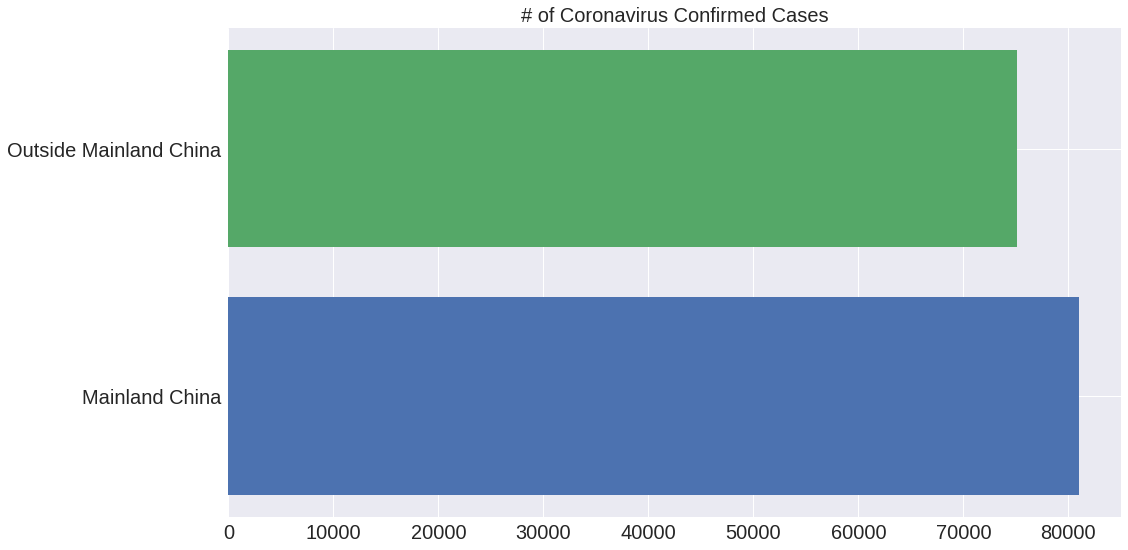

In [11]:
china_confirmed=latest_confirmed[confirmed_df['Country/Region']=='China'].sum()
outside_mainland_china_confirmed=np.sum(country_confirmed_cases)-china_confirmed
plt.figure(figsize=(16,9))
plt.barh('Mainland China',china_confirmed)
plt.barh('Outside Mainland China',outside_mainland_china_confirmed)
plt.title('# of Coronavirus Confirmed Cases',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [12]:
print('Outside Mainland China {} cases:'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland China 75125 cases:
Mainland China: 80977 cases
Total: 156102 cases


In [0]:
#Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries=[]
visual_confirmed_cases=[]
others=np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

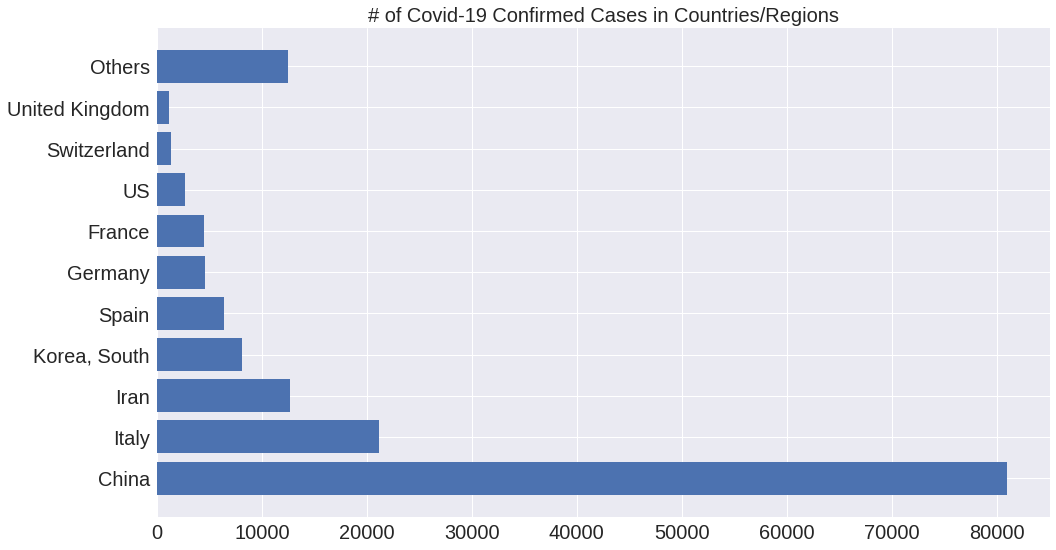

In [14]:
plt.figure(figsize=(16,9))
plt.barh(visual_unique_countries,visual_confirmed_cases)
plt.title('# of Covid-19 Confirmed Cases in Countries/Regions',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

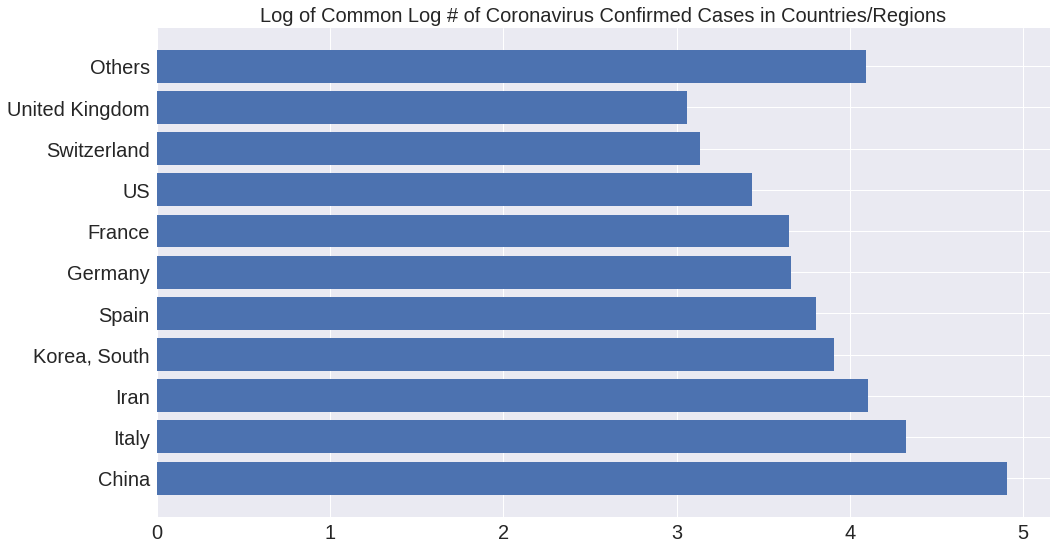

In [15]:
log_country_confirmed_cases=[math.log10(i) for i in visual_confirmed_cases]
plt.figure(figsize=(16,9))
plt.barh(visual_unique_countries,log_country_confirmed_cases)
plt.title('Log of Common Log # of Coronavirus Confirmed Cases in Countries/Regions',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [0]:
visual_unique_provinces=[]
visual_confirmed_cases2=[]
others=np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

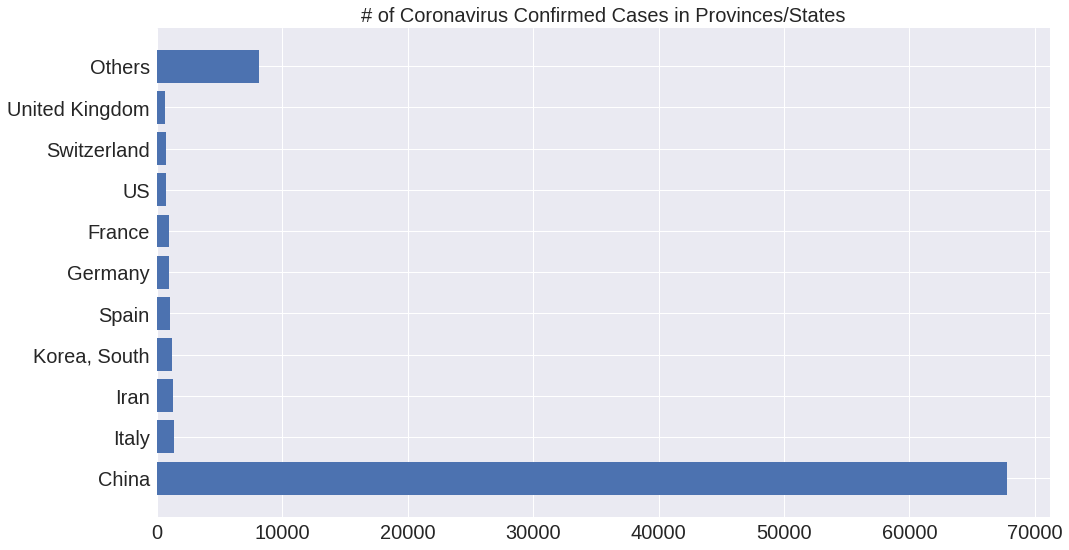

In [17]:
plt.figure(figsize=(16,9))
plt.barh(visual_unique_countries,visual_confirmed_cases2)
plt.title('# of Coronavirus Confirmed Cases in Provinces/States',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

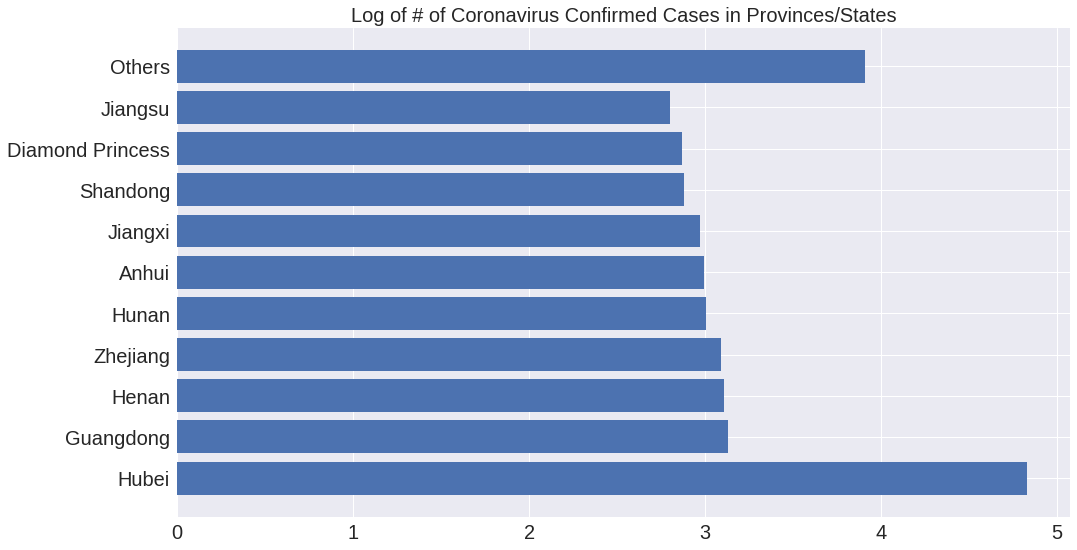

In [18]:
log_province_confirmed_cases=[math.log10(i) for i in visual_confirmed_cases2]
plt.figure(figsize=(16,9))
plt.barh(visual_unique_provinces,log_province_confirmed_cases)
plt.title('Log of # of Coronavirus Confirmed Cases in Provinces/States',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

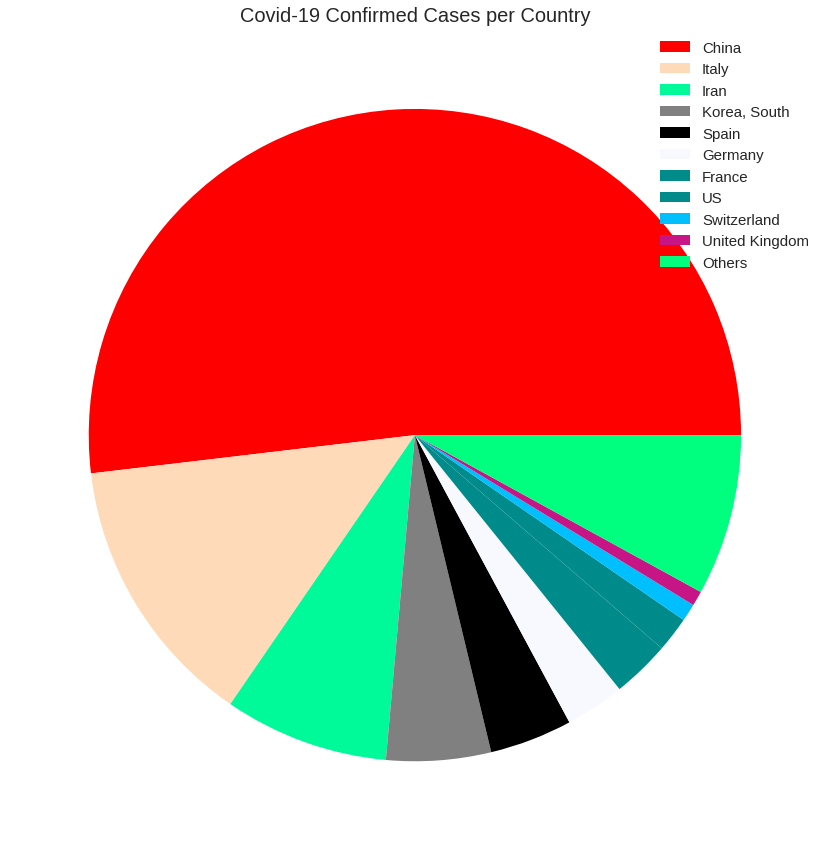

In [19]:
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(20,15))
plt.title('Covid-19 Confirmed Cases per Country',size=20)
plt.pie(visual_confirmed_cases,colors=c)
plt.legend(visual_unique_countries,loc='best',fontsize=15)
plt.show()

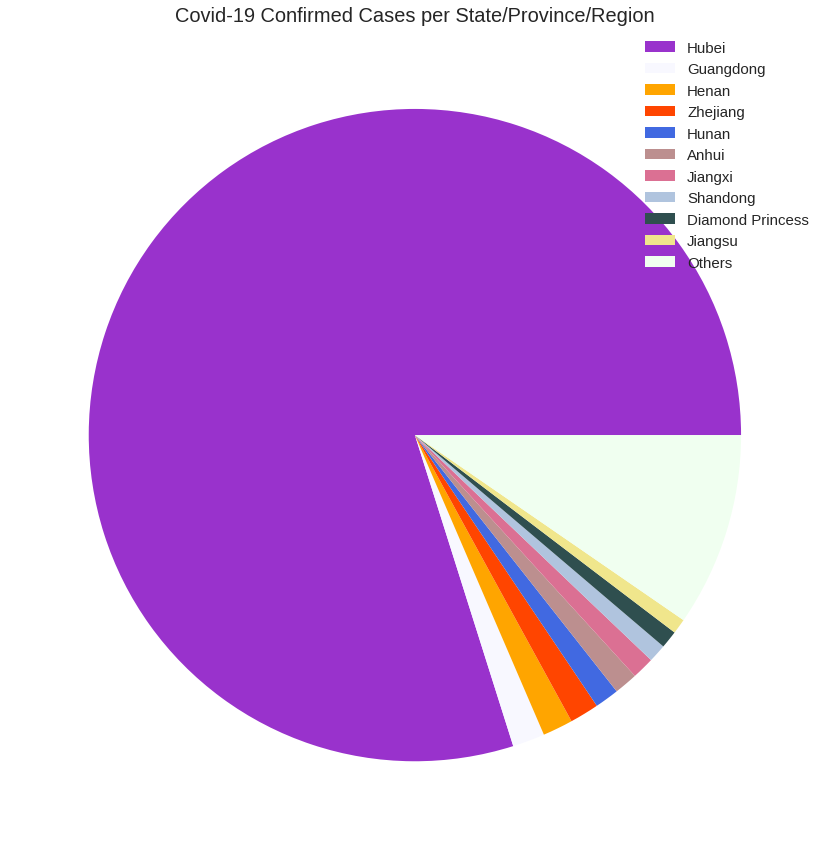

In [20]:
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(20,15))
plt.title('Covid-19 Confirmed Cases per State/Province/Region',size=20)
plt.pie(visual_confirmed_cases2,colors=c)
plt.legend(visual_unique_provinces,loc='best',fontsize=15)
plt.show()

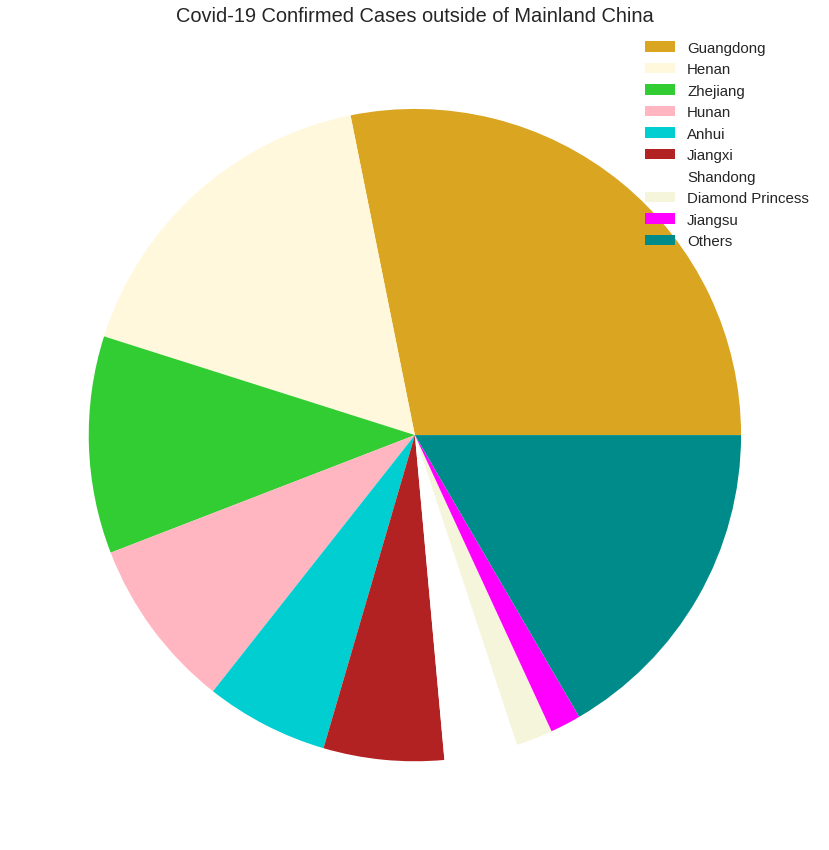

In [21]:
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(20,15))
plt.title('Covid-19 Confirmed Cases outside of Mainland China',size=20)
plt.pie(visual_confirmed_cases[1:],colors=c)
plt.legend(visual_unique_provinces[1:],loc='best',fontsize=15)
plt.show()

# US States

In [0]:
us_regions = list(confirmed_df[confirmed_df['Country/Region']=='US']['Province/State'].unique())
us_confirmed_cases = []
no_cases = [] 
for i in us_regions:
    cases = latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases > 0:
        us_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    us_regions.remove(i)
    
# only show the top 10 states
us_regions = [k for k, v in sorted(zip(us_regions, us_confirmed_cases), key=operator.itemgetter(1), reverse=True)]

for i in range(len(us_regions)):
    us_confirmed_cases[i] = latest_confirmed[confirmed_df['Province/State']==us_regions[i]].sum()  

us_regions_10 = us_regions[:10]
us_regions_10.append('Others')
us_confirmed_cases_10 = us_confirmed_cases[:10]
us_confirmed_cases_10.append(np.sum(us_confirmed_cases[10:]))

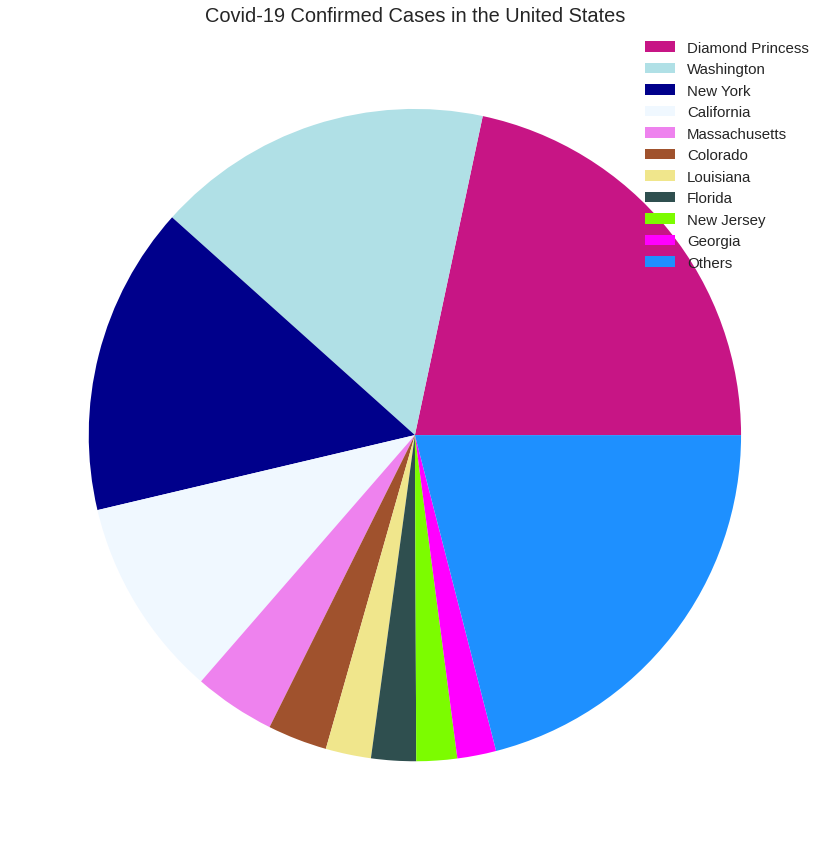

In [23]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,15))
plt.title('Covid-19 Confirmed Cases in the United States',  size=20)
plt.pie(us_confirmed_cases_10, colors=c)
plt.legend(us_regions_10, loc='best', fontsize=15)
plt.show()

In [0]:
# looking at Chinese provinces
china_regions = list(confirmed_df[confirmed_df['Country/Region']=='China']['Province/State'].unique())
china_confirmed_cases = []
no_cases = [] 
for i in china_regions:
    cases = latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases > 0:
        china_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    china_confirmed_cases.remove(i)
    
china_regions = [k for k, v in sorted(zip(china_regions, china_confirmed_cases), key=operator.itemgetter(1), reverse=True)]

for i in range(len(china_regions)):
    china_confirmed_cases[i] = latest_confirmed[confirmed_df['Province/State']==china_regions[i]].sum()  

china_regions_10 = china_regions[:10]
china_regions_10.append('Others')
china_confirmed_cases_10 = china_confirmed_cases[:10]
china_confirmed_cases_10.append(np.sum(china_confirmed_cases[10:]))

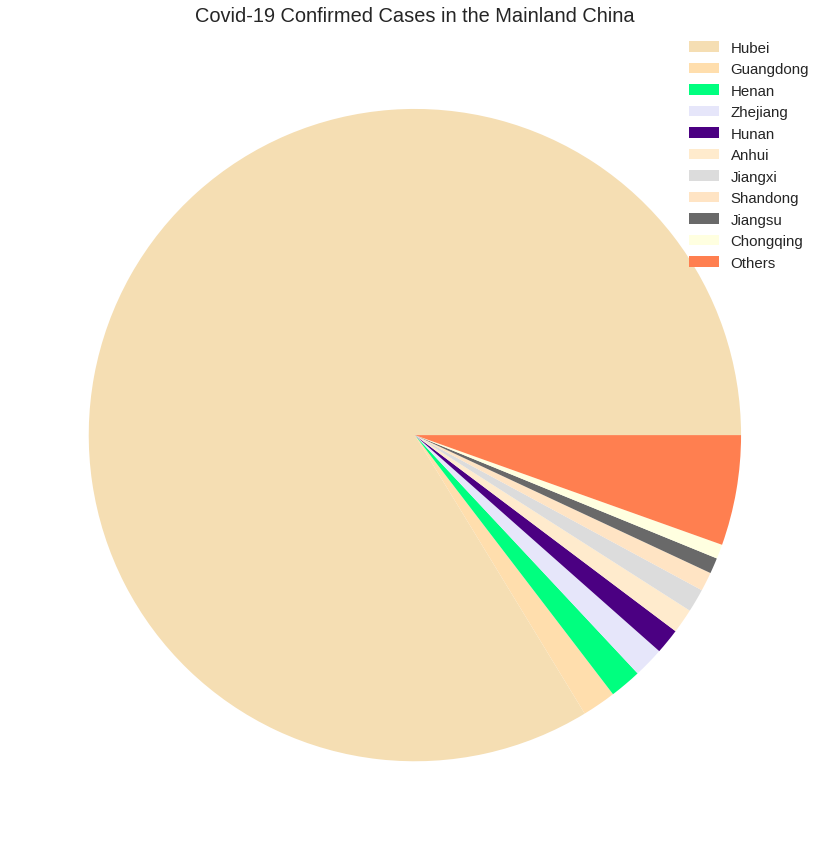

In [25]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,15))
plt.title('Covid-19 Confirmed Cases in the Mainland China', size=20)
plt.pie(china_confirmed_cases_10, colors=c)
plt.legend(china_regions_10, loc='best', fontsize=15)
plt.show()

# More visualisations

In [26]:
data = pd.read_csv("https://raw.githubusercontent.com/rittmang/Data-Mining/master/COVID-19/covid_19_data.csv",parse_dates=['ObservationDate','Last Update'])
print(data.shape)
print('Last update: '+str(data.ObservationDate.max()))

(6722, 8)
Last update: 2020-03-18 00:00:00


In [27]:
checkdup = data.groupby(['Country/Region','Province/State','ObservationDate']).count().iloc[:,0]
checkdup[checkdup>1]

Country/Region  Province/State  ObservationDate
Mainland China  Gansu           2020-03-11         2
                                2020-03-12         2
                Hebei           2020-03-11         2
                                2020-03-12         2
Name: SNo, dtype: int64

In [28]:
data = data[data.Confirmed>0]
data = data.drop(['SNo','Last Update'],axis=1)
data = data.rename(columns={'Country/Region':'Country','ObservationDate':'Date'})
#to check null values
data.isnull().sum()

Date                 0
Province/State    2744
Country              0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [0]:
# Sort data
data = data.sort_values(['Date','Country','Province/State'])
# Add column of days since first case
data['first_date'] = data.groupby('Country')['Date'].transform('min')
data['days'] = (data['Date'] - data['first_date']).dt.days
def get_place(row):
    if row['Province/State'] == 'Hubei':
        return 'Hubei PRC'
    elif row['Country'] == 'Mainland China': 
        return 'Others PRC'
    else: return 'World'
    
data['segment'] = data.apply(lambda row: get_place(row), axis=1)

Latest status update

In [30]:
latest = data[data.Date == data.Date.max()]
print ('Total confirmed cases: %.d' %np.sum(latest['Confirmed']))
print ('Total death cases: %.d' %np.sum(latest['Deaths']))
print ('Total recovered cases: %.d' %np.sum(latest['Recovered']))
print ('Death rate %%: %.2f' % (np.sum(latest['Deaths'])/np.sum(latest['Confirmed'])*100))

Total confirmed cases: 214915
Total death cases: 8733
Total recovered cases: 83313
Death rate %: 4.06


# Feature Importance

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
mms = MinMaxScaler()

In [0]:
cluster_data = pd.read_csv("https://raw.githubusercontent.com/rittmang/Data-Mining/master/COVID-19/Countries_usefulFeatures.csv")
data = pd.read_csv("https://raw.githubusercontent.com/rittmang/Data-Mining/master/COVID-19/train.csv")
data2 = pd.read_csv("/content/drive/My Drive/week5-train.csv")
country_geo = "https://raw.githubusercontent.com/rittmang/Data-Mining/master/COVID-19/world-countries.json"


In [0]:
data_to_cluster = cluster_data.copy()
data_to_cluster = data_to_cluster[["Country_Region","Population_Size","Tourism","Date_FirstFatality","Date_FirstConfirmedCase","Latitude","Longtitude","Mean_Age"]]
data_to_cluster.isnull().sum()
data_to_cluster.Date_FirstFatality.fillna("2222-11-11",inplace=True)
data_to_cluster.Date_FirstFatality=pd.to_datetime(data_to_cluster.Date_FirstFatality)
data_to_cluster.Date_FirstFatality = data_to_cluster.Date_FirstFatality.astype(np.int64) // 10**9
data_to_cluster.Date_FirstConfirmedCase=pd.to_datetime(data_to_cluster.Date_FirstConfirmedCase)
data_to_cluster.Date_FirstConfirmedCase = data_to_cluster.Date_FirstConfirmedCase.astype(np.int64) // 10**9
data_to_cluster.drop(["Country_Region"],axis=1,inplace=True)
mms.fit(data_to_cluster)
data_transformed = mms.transform(data_to_cluster)

# Check for optimal K in K Means clustering

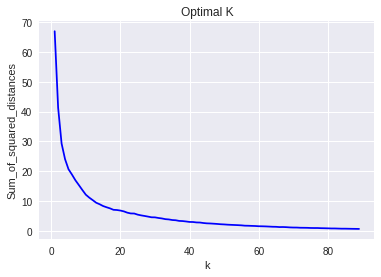

In [69]:
Sum_of_squared_distances = []
K = range(1,90)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal K')
plt.show()

In [0]:
km = KMeans(n_clusters=55,random_state=1995)
km = km.fit(data_transformed)
cluster_data["cluster"] = km.labels_


In [0]:
data.head()
data.drop("Province_State",axis=1,inplace=True)
data = pd.merge(data,cluster_data,on='Country_Region',how="left")

In [0]:
temp_data = data.groupby(["Country_Region","Date"]).agg({"ConfirmedCases":"sum","Fatalities":"sum"}).reset_index()
temp_data.columns = ["Country_Region","Date","ConfirmedCases_i","Fatalities_i"]
data.drop_duplicates(["Country_Region","Date"],inplace=True)
data = pd.merge(data,temp_data,on=['Country_Region',"Date"],how="left")
data.drop(["ConfirmedCases","Fatalities"],axis=1,inplace=True)
data.rename(columns={"ConfirmedCases_i":"ConfirmedCases","Fatalities_i":"Fatalities","clusters":"cluster"},inplace=True)

In [0]:
data["Fatalities_rate"]=data.Fatalities * 100 / data.ConfirmedCases
data["diff_FC_LD"]=(data.Lockdown_Date.astype('datetime64') - data.Date_FirstConfirmedCase.astype('datetime64'))
data["diff_FF_LD"]=(data.Lockdown_Date.astype('datetime64') - data.Date_FirstFatality.astype('datetime64'))
tempd2=data2.loc[(data2.Target=="ConfirmedCases"),["Country_Region","Weight"]]
tempd2["Weight_F"] =  data2.loc[(data2.Target=="Fatalities"),["Weight"]].values
tempd2.columns = ["Country_Region","Weight_C","Weight_F"]
tempd2=tempd2.drop_duplicates(["Country_Region"])
data = pd.merge(data,tempd2[["Country_Region","Weight_C","Weight_F"]],on=['Country_Region'],how="left")

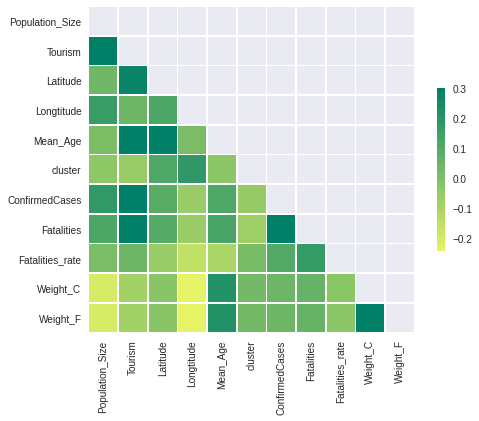

In [74]:
import seaborn as sns
corr = data.drop(["Id"],axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,mask=mask,cmap='summer_r',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

In [0]:
def feature_imp(df,model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [0]:
train = data.copy()
train.Date_FirstFatality.fillna("2222-11-11",inplace=True)
train.Date_FirstFatality=pd.to_datetime(train.Date_FirstFatality)
train.Date_FirstFatality = train.Date_FirstFatality.astype(np.int64) // 10**9

train.Date_FirstConfirmedCase=pd.to_datetime(train.Date_FirstConfirmedCase)
train.Date_FirstConfirmedCase = train.Date_FirstConfirmedCase.astype(np.int64) // 10**9

train.Date=pd.to_datetime(train.Date)
train.Date = train.Date.astype(np.int64) // 10**9

train.Lockdown_Date.fillna("2111-12-12",inplace=True)
train.Lockdown_Date=pd.to_datetime(train.Lockdown_Date)
train.Lockdown_Date = train.Lockdown_Date.astype(np.int64) // 10**9


train.Lockdown_Type = train.Lockdown_Type.astype("category")
train.Lockdown_Type = train.Lockdown_Type.cat.codes

train.diff_FC_LD.replace({np.NAN:"62"},inplace=True)
train.diff_FF_LD.replace({np.NAN:"42"},inplace=True)
train.diff_FC_LD=train.diff_FC_LD.astype(str)
train.diff_FF_LD=train.diff_FF_LD.astype(str)
train.diff_FC_LD=train.diff_FC_LD.str[:2]
train.diff_FF_LD=train.diff_FF_LD.str[:2]
train.diff_FC_LD = train.diff_FC_LD.astype(int)
train.diff_FF_LD = train.diff_FF_LD.astype(int)
train = train[train.Date == max(train.Date)]

In [77]:
rf = RandomForestRegressor(n_estimators = 1000,
                           n_jobs = -1,
                           random_state = 141)
rf.fit(train.drop(['Country_Region',"Id","Fatalities","ConfirmedCases","Fatalities_rate","Date","Country_Code","Date_FirstFatality","Date_FirstConfirmedCase","Lockdown_Date"],axis=1), train["Fatalities"])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=141, verbose=0, warm_start=False)

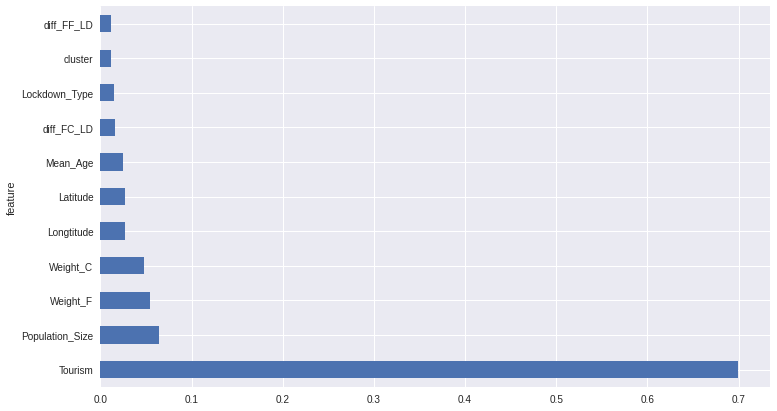

In [78]:
fimp = feature_imp(train.drop(['Country_Region',"Id","Fatalities","ConfirmedCases","Fatalities_rate","Date","Country_Code","Date_FirstFatality","Date_FirstConfirmedCase","Lockdown_Date"],axis=1),rf)
feature_imp(train.drop(['Country_Region',"Id","Fatalities","ConfirmedCases","Fatalities_rate","Date","Country_Code","Date_FirstFatality","Date_FirstConfirmedCase","Lockdown_Date"],axis=1),rf).plot('feature', 'importance', 'barh', figsize=(12,7), legend=False)

Checking correlation between Fatalities, Tourism and population size

In [79]:
import plotly.express as px
fig = px.scatter(data[(data.Tourism>100000) & (data.Date == max(data.Date)) ],
                 x='Tourism', y='Fatalities', color='Country_Region', size='Mean_Age', height=700,
                 text='Country_Region',log_x=True,log_y=True)
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [80]:
fig = px.scatter(data[(data.Population_Size>100000) & (data.Date == max(data.Date)) ],
                 x='Population_Size', y='Fatalities', color='Country_Region', size='Mean_Age', height=700,
                 text='Country_Region',log_x=True,log_y=True)
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [81]:
fig = px.scatter(data[(data.Population_Size>100000) & (data.Date == max(data.Date)) ],
                 x='Weight_F', y='Fatalities', color='Country_Region', size='Mean_Age', height=700,
                 text='Country_Region',log_x=True,log_y=True)
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

# Predicting confirm cases from fatalities

In [0]:
data.sort_values(["Country_Region"],inplace=True)

In [0]:
def predict_ConfirmedCases(test_country):
    tmp_data=data[(data.Date == max(data.Date))]
    test_data=tmp_data[tmp_data.Country_Region == test_country]
    train_data = tmp_data[(tmp_data.Country_Region !=test_country) & (tmp_data.Fatalities_rate >= 2) & (tmp_data.Fatalities_rate <= 6)]
    #print(test_data)
    
    mms.fit(train_data[['Fatalities',"Population_Size","Tourism","Mean_Age","cluster"]])
    data_transformed = mms.transform(train_data[['Fatalities',"Population_Size","Tourism","Mean_Age","cluster"]])
    
    rg = Ridge(alpha=0.00001)
    rg.fit(data_transformed,train_data["ConfirmedCases"])
   
    predictions=rg.predict(mms.transform(test_data[['Fatalities',"Population_Size","Tourism","Mean_Age","cluster"]]))
    return pd.DataFrame([test_country,predictions[0]]).transpose()

In [86]:
tmp_df = pd.DataFrame([data.Country_Region.unique()]).T
tmp_df.columns =["Country_Region"]
for i in data.Country_Region.unique():
    d=predict_ConfirmedCases(i)
    tmp_df.loc[tmp_df.Country_Region == i,"predicted_C"] = predict_ConfirmedCases(i)[1].values[0]
tmp_df["acc_C"] = data.loc[(data.Date == max(data.Date)),"ConfirmedCases"].values
tmp_df.predicted_C = tmp_df.predicted_C.apply(lambda x: int(round(x,2)))
tmp_df.acc_C = tmp_df.acc_C.astype("int")
tmp_df[tmp_df.Country_Region.isin(["Morocco","Egypt","Algeria","Tunisia","France","Spain","Italy","Germany","Korea, South"])]

,Country_Region,predicted_C,acc_C
2,Algeria,7494,4997
52,Egypt,20397,7588
61,France,479644,174224
65,Germany,136882,168162
84,Italy,520167,214457
90,"Korea, South",14553,10810
116,Morocco,10027,5408
156,Spain,475213,220325
169,Tunisia,4139,1025
